In [31]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import read_csv, concat
from tqdm import tqdm
sns.set_style('white')
sns.set_context('notebook', font_scale=2)
%matplotlib inline

In [2]:
## Load reject data.
reject = read_csv(os.path.join('data','reject.csv'))

## Initialize metrics DataFrame.
metrics = reject[['platform','subject','infreq']].copy()
metrics['infreq'] = np.where(metrics['infreq'] > 0, 1, 0)

In [49]:
import h5py
from pandas import DataFrame

## Extract behavior.
with h5py.File(os.path.join('stan_results',f'softmax_regression_mcmc.hdf5'), 'r') as hdf5:
    contrasts = hdf5['contrasts'][:]
    W = hdf5['W'][:]
    
W = DataFrame(W.T, columns=[f'W{i+1}' for i in range(W.shape[0])])
W['Infrequency'] = metrics.infreq

W = W.melt(id_vars='Infrequency', var_name='param', value_name='estimate')

In [50]:
W['lag'] = W.param.apply(lambda x: (int(x[1:])-1) % 5 + 1)
W['class'] = W.param.apply(lambda x: (int(x[1:])-1) // 5)
W['Infrequency'] = W.Infrequency.replace({1:'Any Fail',0:'No Fail'})

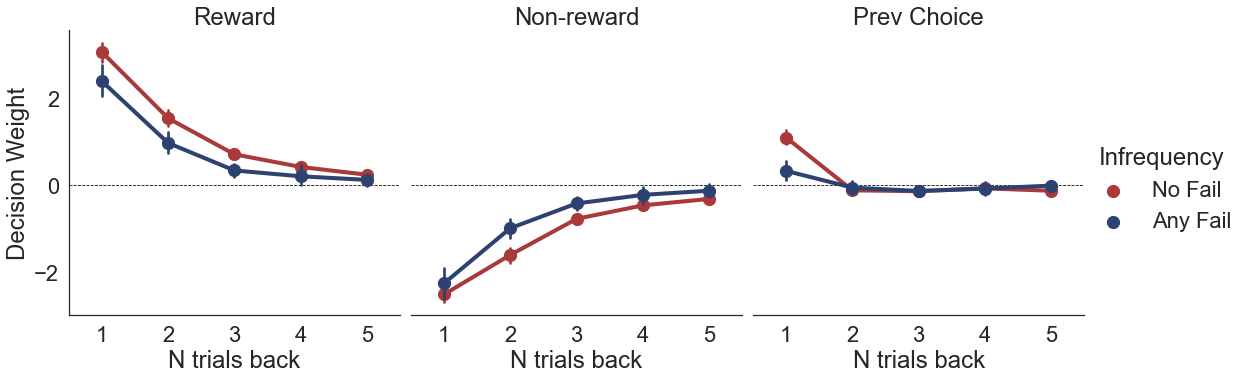

In [51]:
g = sns.catplot(x='lag', y='estimate', hue='Infrequency', data=W, col='class', kind='point', 
                 hue_order=['No Fail', 'Any Fail'], palette=['#AA3939','#2E4272'], scale=1.5)

titles = ['Reward','Non-reward','Prev Choice']

for i, ax in enumerate(g.axes.flatten()): 
    ax.axhline(0, lw=0.8, linestyle='--', color='k', zorder=-1)
    ax.set(xlabel='N trials back', title=titles[i])
    if not i: ax.set_ylabel('Decision Weight')
    else: sns.despine(left=True, ax=ax)